In [3]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [4]:
# Parameters
d = 1
k = 2
deltas = np.arange(0.1, 2., 0.1)
N = 1500

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

idx_funcs = [
    lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0),
    lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0),
]
operators = [
    lambda func: lambda *x: - func.laplacian(*x) + func(*x),
    lambda func: lambda *x: func(*x),
]

# Integration
# integrator = rad.integrate.MeanIntegrator(ranges, 2000)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(deltas), 3))

for i, delta in enumerate(deltas):
    # Solve for approximate solution
    phi = rad.Wendland(d, k, delta, xc)
    # solver = rad.solve.GalerkinSolver(phi, integrator, 'helmholtz')
    solver = rad.solve.CollocationSolver(phi, operators, idx_funcs)
    # approx = solver.solve(f)
    approx = solver.solve(f, g)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i,0] = error
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("Delta:", delta)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

Delta: 0.1
  L2 Relative Error: 0.3506320237012255
  Condition Number: 10642097.890442135
  Bandwidth: 149
Delta: 0.2
  L2 Relative Error: 0.03666662359333841
  Condition Number: 10825578.821598295
  Bandwidth: 299
Delta: 0.30000000000000004
  L2 Relative Error: 0.006897658198938671
  Condition Number: 11673817.954251504
  Bandwidth: 449
Delta: 0.4
  L2 Relative Error: 0.0011263940282681502
  Condition Number: 14255375.941651309
  Bandwidth: 599
Delta: 0.5
  L2 Relative Error: 0.00023600757712019386
  Condition Number: 19553378.85414066
  Bandwidth: 749
Delta: 0.6
  L2 Relative Error: 0.002456308872541017
  Condition Number: 2955193.0210695686
  Bandwidth: 899
Delta: 0.7000000000000001
  L2 Relative Error: 0.0012670773024093087
  Condition Number: 386757.73842914123
  Bandwidth: 1049
Delta: 0.8
  L2 Relative Error: 0.001769081660285
  Condition Number: 36874625.53290195
  Bandwidth: 1199
Delta: 0.9
  L2 Relative Error: 0.0054180363100695805
  Condition Number: 906578.3956686116
  Bandw

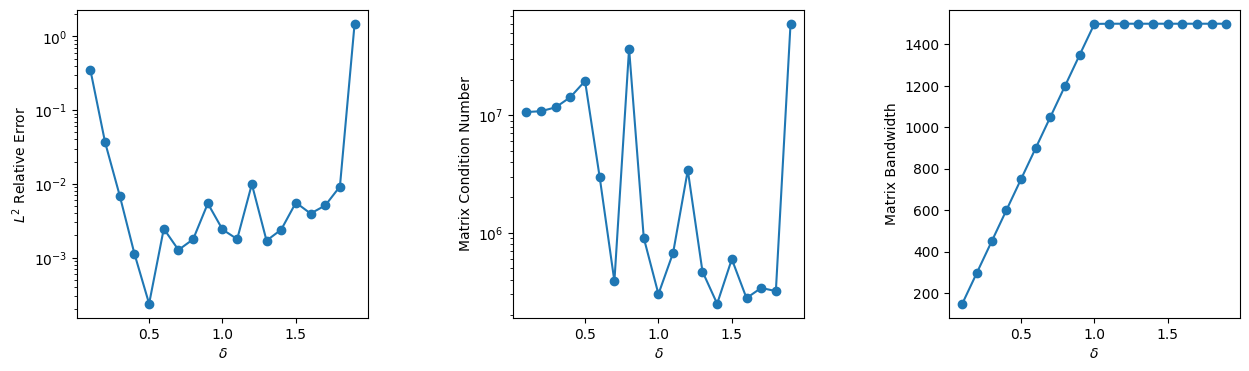

In [7]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(15,4))

axs[0].set_xlabel(r"$\delta$")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(deltas, results[:, 0], 'o-')

axs[1].set_xlabel(r"$\delta$")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(deltas, results[:, 1], 'o-')

axs[2].set_xlabel("$\delta$")
axs[2].set_ylabel("Matrix Bandwidth")
axs[2].plot(deltas, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/kansa-deltas.pdf")

In [8]:
print(np.shape(results))

(19, 3)
